# KNN（k-近邻分类算法）

## 1.算距离
## 2.找邻居
## 3.做分类

In [36]:
# raw_data_X 样本特征  raw_data_y 所属类别， 0为良性肿瘤，1为恶性肿瘤

raw_data_X =[[3.3935,2.3312],[3.1100,1.7815],[1.3438,3.3683],
             [3.5822,4.6791],[2.2803,2.8669],[7.4234,4.6965],
             [5.7450,3.5339],[9.1721,2.5110],[7.7927,3.4240],
             [7.9398,0.7916]]
raw_data_y =[0,0,0,0,0,1,1,1,1,1]

In [37]:
raw_data_X

[[3.3935, 2.3312],
 [3.11, 1.7815],
 [1.3438, 3.3683],
 [3.5822, 4.6791],
 [2.2803, 2.8669],
 [7.4234, 4.6965],
 [5.745, 3.5339],
 [9.1721, 2.511],
 [7.7927, 3.424],
 [7.9398, 0.7916]]

In [38]:
type(raw_data_X)

list

In [39]:
import numpy as np
##转换为矩阵
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [40]:
X_train.shape

(10, 2)

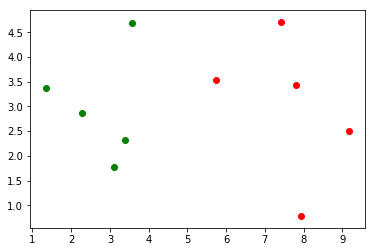

In [41]:
###绘制散点图
import matplotlib.pyplot as plt
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color ='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.show()

In [42]:
from math import sqrt
x=np.array([8.0936,3.3657])

In [43]:
distance = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distance.append(d)

In [44]:
distance

[4.81260119478022,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.4900324425998253,
 2.354615297665417,
 1.376108404160079,
 0.3064958401022765,
 2.578690607653427]

## 列表推导式

In [45]:
distance=[sqrt(np.sum((x_train-x)**2))for x_train in X_train]

In [46]:
distance

[4.81260119478022,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.4900324425998253,
 2.354615297665417,
 1.376108404160079,
 0.3064958401022765,
 2.578690607653427]

In [47]:
nearest=np.argsort(distance)

In [48]:
k=6
topK_y =[y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [49]:
from collections import Counter#对数组出现的元素的频次计数

In [50]:
votes = Counter(topK_y)#投票

In [51]:
votes.most_common(1)

[(1, 5)]

In [52]:
votes.most_common(1)[0][0]

1

In [53]:
###存储为测试值
predict_y = votes.most_common(1)[0][0]
predict_y

1

## scikit-learn中的knn

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
KN_classifier=KNeighborsClassifier(n_neighbors=6)
KN_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [56]:
x = np.array([8.0936,3.3657])
x_predict = x.reshape(1,-1)
x_predict.ndim


2

In [57]:
KN_classifier.predict(x_predict)##要求参数为矩阵

NotFittedError: Must fit neighbors before querying.

In [58]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7
 

## KNN手写函数


In [60]:
def knn_distance(X,y): 
    distance = []
    for x_train in X_train:
        d = sqrt(np.sum((x_train - x)**2))
        distance.append(d)
    return distance

In [61]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
y=np.array([8.0936,3.3657])

In [62]:
knn_distance(X_train,y)###出入的参数

[4.81260119478022,
 5.22933634412628,
 6.749800500755559,
 4.698696576711461,
 5.834660086928801,
 1.4900324425998253,
 2.354615297665417,
 1.376108404160079,
 0.3064958401022765,
 2.578690607653427]


## 鸢尾花数据

In [63]:
from sklearn import datasets

In [64]:
iris = datasets.load_iris()

In [65]:
X = iris.data
y = iris.target

In [66]:
X.shape

(150, 4)

In [67]:
y.shape

(150,)

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 666)

In [77]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [78]:
X_predict = X_test
a=kN_classifier.predict(X_predict)

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 4 while Y.shape[1] == 2

In [79]:
type(a)

NameError: name 'a' is not defined

In [ ]:
from collections import Counter#对数组出现的元素的频次计数
votes = Counter(a)#投票

In [ ]:
votes.most_common(3)

## 乱序

In [ ]:
shuffle_indxes = np.random.permutation(len(X)) 

In [ ]:
shuffle_indxes

In [ ]:
test_ration = 0.2

In [ ]:
test_size = int(len(X)*test_ration)

In [ ]:
test_indexes = shuffle_indxes[:test_size]
train_indexes = shuffle_indxes[test_size:]

In [ ]:
X_train = X[train_indexes]
y_train = y[train_indexes]
X_train = X[test_indexes]
y_test = y[test_indexes]

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
kNN_classifier =KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train,y_train)

In [ ]:
KNN_classifier.predict(X_test)

In [ ]:
b = kNN_classifier.predict(X_test)

In [75]:
from collections import Counter   #对数组出现的元素频次计数
votes = Counter(a)

NameError: name 'a' is not defined

In [74]:
votes.most_common(3)

[(1, 5), (0, 1)]

## __分类准确度__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

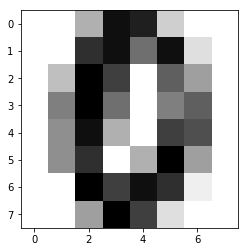

In [9]:
import matplotlib
some_digits=X[666]
some_digit_image = some_digits.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.show()

## 分类准确度

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 666)

In [12]:
knn_clf = KNeighborsClassifier(n_neighbors = 4)
knn_clf.fit(X_train,y_train)
y_predict = knn_clf.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,y_predict)

0.9916666666666667

In [15]:
knn_clf.score(X_test,y_test)

0.9916666666666667

## __寻找最好的k__

In [16]:
best_score = 0.0
best_k = 1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    score = knn_clf.score(X_test,y_test)
    if score > best_score:
        best_k = k
        best_score = score
print('best_k =',best_k)
print('best_score =',best_score)

best_k = 4
best_score = 0.9916666666666667


## __加上考虑权重的情况__

In [17]:
best_method = ""
best_score = 0.0
best_k = 1
for method in ['uniform','distance']:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors = k,weights = method)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_method=",best_method)
print("best_k=",best_k)
print("best_score=",best_score)

best_method= uniform
best_k= 4
best_score= 0.9916666666666667


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris_data = datasets.load_iris()

In [19]:
X_iris = iris_data.data
y_iris = iris_data.target
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [20]:
shuffle = np.random.permutation(len(X_iris))
shuffle

array([145,  93, 122, 107, 129,  74, 138, 126,  50, 108,  26,  67,  17,
       147,  64,  40,  58,  77,  33,   6,  54,  99,  18, 137, 127, 106,
       142,  53,  52, 124,  21,  43, 117, 104, 116, 102,  79, 111,  57,
        75,  92,  28,  41,  85,   1,  22,  46,  56,  89,  27, 118, 103,
        73,  87,  82,   8, 133,  14,  66,  29, 149, 112,  38, 134, 148,
       120,  94,  24,  90,  86, 131, 123,  68, 114,  63,  34,  13,  55,
       101,  16, 143, 128,  51, 139,  39,  44,  91,  30,  78,  48,  71,
       119, 132,  32,  11,  25,  62,  20,  84,  61, 121,   2,  98, 141,
        95, 113, 109,   7,  23,   4,  36,  19,  42,  12,  31,   5,  60,
        96,  88,  81,  35,  49,  70, 130, 140, 115, 146,  15, 135,   9,
        76, 105,  80,  72, 144,   3, 110, 136,  69,  10, 100,  47,  65,
         0,  97, 125,  59,  83,  45,  37])

In [21]:
iris_test_ration = 0.2
iris_test_size = int(len(X_iris)*iris_test_ration)
iris_test_indexes = shuffle[:iris_test_size]
iris_train_indexes = shuffle[iris_test_size:]
X_train_iris = X_iris[iris_train_indexes]
y_train_iris = y_iris [iris_train_indexes]
X_test_iris = X_iris[iris_test_indexes]
y_test_iris = y_iris[iris_test_indexes]

In [22]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train_iris,y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
y_predict_iris = knn_clf.predict(X_test_iris)

In [24]:
accuracy_score(y_test_iris,y_predict_iris)

0.9

In [25]:
knn_clf.score(X_test_iris,y_test_iris)

0.9